# Project 2: Ames Housing Data and Kaggle Challenge

## Excutive Summary

In this notebook we seek to use regression to predict housing prices. There are many factors that affect home prices, the more common factors are the size, the quality and the age of the property.

In this notebook we use a dataset from Kaggle, the goal of the dataset is to predict the sales price of home given the features of the home. As home prices are continuous, this is a regression problem. As such we select features in the dataset with Exploratory Data Analysis to fit into an OLS regression model. We then compare the results with different types of regularisation (Ridge and Lasso).

The best model with the lowest Root Mean Squared Error (RMSE) will be selected to fit the training data predict a test set provided by Kaggle. This will be uploaded in Kaggle Competitition and will be evaluated by the RMSE.

A good model that captures enough variables and charateristics of the house will be useful in many ways. For prediction, it serves to determine the fair value of the property given its characteristics. For inference, we can get a flavour as to what variables affect the price of houses.

## Content
- [Problem Statement](#ps)
- [Data importing and cleaning](#data)
- [Exploratory Data Analysis](#eda)
- [Modeling](#mod)
- [Kaggle Submission](#kag)
- [Conclusion and Evaluation](#conclusion)

<a id='ps'></a>
## Problem Statement


What combination of parameters and hyperparameters should be used in a regression model to best predict housing prices?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.linear_model import (LinearRegression, RidgeCV, LassoCV, Ridge, Lasso)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Data Cleaning and EDA

Are missing values imputed appropriately?

Are distributions examined and described?

Are outliers identified and addressed?

Are appropriate summary statistics provided?

Are steps taken during data cleaning and EDA framed appropriately?

Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?


<a id='data'></a>
## Data importing and cleaning

The dataset used in this study is from the Ames Iowa Boston Housing Dataset. It contains information on residential properties sold in Ames from 2006 to 2010.

In this section, we will load the dataset, rename the columns, check for null values, check for feature data types.

In [2]:
# Load the data
df = pd.read_csv('datasets/train.csv')

In [3]:
# Print the first 10 rows
df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [4]:
# Rename columns
new_col_name = {col:col.replace(" ","_").lower() for col in df}
df.rename(columns = new_col_name, inplace = True)

##### Remove known outlier
Remove observation from special notes http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

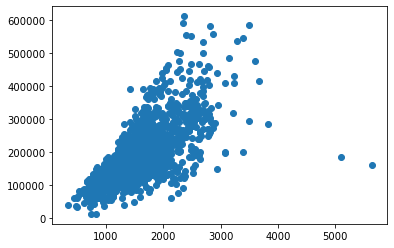

In [5]:
plt.scatter(x = df['gr_liv_area'], y = df['saleprice']);


In [6]:
df[df['gr_liv_area'] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [7]:
# Drop the outliers
df = df[df['gr_liv_area'] < 4000]

### Data Dictionary

Below is the data dictionary from the raw data.

| Feature | Type | Dataset | Description |  |
|-|-|-|-|-|
| id | int64 | train | Order ID |  |
| pid | int64 | train | Parcel identification number  - can   be used with city web site for parcel review.  |  |
| ms_subclass | int64 | train | Identifies the type of dwelling involved in the sale.	 |  |
| ms_zoning | object | train | Identifies the general zoning classification of the sale. |  |
| lot_frontage | float64 | train | Linear feet of street connected to property |  |
| lot_area | int64 | train | Lot size in square feet |  |
| street | object | train | Type of road access to property |  |
| alley | object | train | Type of alley access to property |  |
| lot_shape | object | train | General shape of property |  |
| land_contour | object | train | Flatness of the property |  |
| utilities | object | train | Type of utilities available |  |
| lot_config | object | train | Lot configuration |  |
| land_slope | object | train | Slope of property |  |
| neighborhood | object | train | Physical locations within Ames city limits (map available) |  |
| condition_1 | object | train | Proximity to various conditions |  |
| condition_2 | object | train | Proximity to various conditions (if more than one is present) |  |
| bldg_type | object | train | Type of dwelling |  |
| house_style | object | train | Style of dwelling |  |
| overall_qual | int64 | train | Rates the overall material and finish of the house |  |
| overall_cond | int64 | train | Rates the overall condition of the house |  |
| year_built | int64 | train | Original construction date |  |
| year_remod/add | int64 | train | Remodel date (same as construction date if no remodeling or additions) |  |
| roof_style | object | train | Type of roof |  |
| roof_matl | object | train | Roof material |  |
| exterior_1st | object | train | Exterior covering on house |  |
| exterior_2nd | object | train | Exterior covering on house (if more than one material) |  |
| mas_vnr_type | object | train | Masonry veneer type |  |
| mas_vnr_area | float64 | train | Masonry veneer area in square feet |  |
| exter_qual | object | train | Evaluates the quality of the material on the exterior  |  |
| exter_cond | object | train | Evaluates the present condition of the material on the exterior |  |
| foundation | object | train | Type of foundation |  |
| bsmt_qual | object | train | Evaluates the height of the basement |  |
| bsmt_cond | object | train | Evaluates the general condition of the basement |  |
| bsmt_exposure | object | train | Refers to walkout or garden level walls |  |
| bsmtfin_type_1 | object | train | Rating of basement finished area |  |
| bsmtfin_sf_1 | float64 | train | Type 1 finished square feet |  |
| bsmtfin_type_2 | object | train | Rating of basement finished area (if multiple types) |  |
| bsmtfin_sf_2 | float64 | train | Type 2 finished square feet |  |
| bsmt_unf_sf | float64 | train | Unfinished square feet of basement area |  |
| total_bsmt_sf | float64 | train | Total square feet of basement area |  |
| heating | object | train | Type of heating |  |
| heating_qc | object | train | Heating quality and condition |  |
| central_air | object | train | Central air conditioning |  |
| electrical | object | train | Electrical system |  |
| 1st_flr_sf | int64 | train | First Floor square feet |  |
| 2nd_flr_sf | int64 | train | Second floor square feet |  |
| low_qual_fin_sf | int64 | train | Low quality finished square feet (all floors) |  |
| gr_liv_area | int64 | train | Above grade (ground) living area square feet |  |
| bsmt_full_bath | float64 | train | Basement full bathrooms |  |
| bsmt_half_bath | float64 | train | Basement half bathrooms |  |
| full_bath | int64 | train | Full bathrooms above grade |  |
| half_bath | int64 | train | Half baths above grade |  |
| bedroom_abvgr | int64 | train | Bedrooms above grade (does NOT include basement bedrooms) |  |
| kitchen_abvgr | int64 | train | Kitchens above grade |  |
| kitchen_qual | object | train | Kitchen quality |  |
| totrms_abvgrd | int64 | train | Total rooms above grade (does not include bathrooms) |  |
| functional | object | train | Home functionality (Assume typical unless deductions are warranted) |  |
| fireplaces | int64 | train | Number of fireplaces |  |
| fireplace_qu | object | train | Fireplace quality |  |
| garage_type | object | train | Garage location |  |
| garage_yr_blt | float64 | train | Year garage was built |  |
| garage_finish | object | train | Interior finish of the garage |  |
| garage_cars | float64 | train | Size of garage in car capacity |  |
| garage_area | float64 | train | Size of garage in square feet |  |
| garage_qual | object | train | Garage quality |  |
| garage_cond | object | train | Garage condition |  |
| paved_drive | object | train | Paved driveway |  |
| wood_deck_sf | int64 | train | Wood deck area in square feet |  |
| open_porch_sf | int64 | train | Open porch area in square feet |  |
| enclosed_porch | int64 | train | Enclosed porch area in square feet |  |
| 3ssn_porch | int64 | train | Three season porch area in square feet |  |
| screen_porch | int64 | train | Screen porch area in square feet |  |
| pool_area | int64 | train | Pool area in square feet |  |
| pool_qc | object | train | Pool quality |  |
| fence | object | train | Fence quality |  |
| misc_feature | object | train | Miscellaneous feature not covered in other categories |  |
| misc_val | int64 | train | $Value of miscellaneous feature |  |
| mo_sold | int64 | train | Month Sold (MM) |  |
| yr_sold | int64 | train | Year Sold (YYYY) |  |
| sale_type | object | train | Type of sale |  |
| saleprice | int64 | train | Sale price $$ |  |

#### Check for nulls

In [8]:
#Check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   pid              2049 non-null   int64  
 2   ms_subclass      2049 non-null   int64  
 3   ms_zoning        2049 non-null   object 
 4   lot_frontage     1719 non-null   float64
 5   lot_area         2049 non-null   int64  
 6   street           2049 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2049 non-null   object 
 9   land_contour     2049 non-null   object 
 10  utilities        2049 non-null   object 
 11  lot_config       2049 non-null   object 
 12  land_slope       2049 non-null   object 
 13  neighborhood     2049 non-null   object 
 14  condition_1      2049 non-null   object 
 15  condition_2      2049 non-null   object 
 16  bldg_type        2049 non-null   object 
 17  house_style   

In [9]:
null_dict = {}
for col in df.columns[df.isnull().sum() > 0]:
    null_dict[col] = df[col].isnull().sum() 


In [10]:
null_dict

{'lot_frontage': 330,
 'alley': 1909,
 'mas_vnr_type': 22,
 'mas_vnr_area': 22,
 'bsmt_qual': 55,
 'bsmt_cond': 55,
 'bsmt_exposure': 58,
 'bsmtfin_type_1': 55,
 'bsmtfin_sf_1': 1,
 'bsmtfin_type_2': 56,
 'bsmtfin_sf_2': 1,
 'bsmt_unf_sf': 1,
 'total_bsmt_sf': 1,
 'bsmt_full_bath': 2,
 'bsmt_half_bath': 2,
 'fireplace_qu': 1000,
 'garage_type': 113,
 'garage_yr_blt': 114,
 'garage_finish': 114,
 'garage_cars': 1,
 'garage_area': 1,
 'garage_qual': 114,
 'garage_cond': 114,
 'pool_qc': 2041,
 'fence': 1649,
 'misc_feature': 1985}

Above are variables that have null values. The approach taken to handle these variables can be summarised as follows:

Step 1. If the variable has null values for a reason (e.g. fireplace_qu - for observations with no fireplace, this value will be NaN). We can still use the variable, as the null values are there for a purpose.

Step 2. For other variables with no clear reason, we will plot some graphs on the variable and decide whether it makes sense to impute some value on the variable. Otherwise we will not use the variable.

We will address the null values in the EDA portion if it is decided that the variable will be considered in the model.

#### Checking column data types

The ms_subclass variable identifies the type of dwelling involved in the sale. It is a catagorical variable, so it is better managed as a object dtype rather than int64.

In [11]:
df['ms_subclass'] = df['ms_subclass'].map(lambda x: str(x))

Summary Statistics

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2049.0,1.473676e+03,8.442481e+02,1.0,753.0,1481.0,2.199000e+03,2930.0
pid,2049.0,7.134001e+08,1.886859e+08,526301100.0,528458130.0,535453160.0,9.071760e+08,924152030.0
lot_frontage,1719.0,6.887900e+01,2.247211e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2049.0,1.002468e+04,6.608512e+03,1300.0,7500.0,9405.0,1.150000e+04,159000.0
overall_qual,2049.0,6.108346e+00,1.421780e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2049.0,5.562714e+00,1.104897e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2049.0,1.971673e+03,3.017129e+01,1872.0,1953.0,1974.0,2.001000e+03,2010.0
year_remod/add,2049.0,1.984166e+03,2.103279e+01,1950.0,1964.0,1993.0,2.004000e+03,2010.0
mas_vnr_area,2027.0,9.879773e+01,1.725638e+02,0.0,0.0,0.0,1.600000e+02,1600.0
bsmtfin_sf_1,2048.0,4.380186e+02,4.398436e+02,0.0,0.0,368.0,7.330000e+02,2188.0


Each of the features appear to have a sensible range. 

<a id='eda'></a>
## Exploratory Data Analysis

The purpose of the exploratory data analysis is to select features for the regression model that will best predict the sales price of the property. We will be looking for variables that have a strong and clear relationship with saleprice.

As there are 81 variables in the dataset, it is not time efficient or meaningful to explain each of the variables. Instead, in this section, we will analyse the variables that has a clear relationship with saleprice and has some level of variation in the variable. After analysing the selected variables, we will breifly explain why some variables were rejected.

### Dependent variable  - salesprice

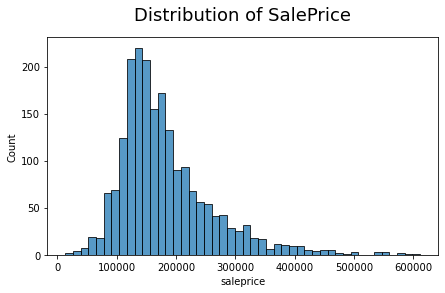

In [13]:
plt.figure(figsize=(7,4))
ax = sns.histplot(df['saleprice'])
ax.set_title('Distribution of SalePrice', size=18, y=1.05);

In [14]:
df['saleprice'].describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

The price of homes has a skewed distribution, it is slightly skewed towards the right with some properties selling for very high quantum. The average home is sold at $181,479


### Methodology for selecting variables

As a rule of thumb, when selecting variables for the model, there are a few factors to take note of:

1) Significant variation in the independent variable.

2) For numerical variables, significant correlation in the dependent variable with the independent variable

3) For categorical variables, unique characteristic between the categories

In [15]:
# Creating empty list of features of interest
features = []

A function is created to visualise the variables.

1) For numerical variables where a histogram and scatterplot (with sales price) is plotted. The correlation of the variable and sales price will be indicated in the title of the figure. This gives a good understanding of the distribution of the varaible as well as its relationship with the dependent variable.

2) For categorical variables, a histogram and boxplot (with sales price) will be plotted. Similarly this helps to see the distribution of the variable as well as if there are significant differences in the sales prices when segmented by the variable.


In [16]:
def eda_plot(df, col):
    # for catagorical variables
    if df[col].dtype == object:
        fig, ax = plt.subplots(2,
                               figsize=(16,8),
                              )
        sns.histplot(ax = ax[0],
                     data = df[col],
                    )
        sns.boxplot(ax = ax[1],
                    x = col,
                    y = 'saleprice',
                    data = df,
                   )
        fig.suptitle(f'{col} histogram & barplot with Sales price',
                     fontsize =30,
                    )
        ax[1].set_xlabel(col,
                         fontsize=20,
                        )
        ax[0].set_ylabel('Count',
                        fontsize= 20,
                        ) 
        ax[1].set_ylabel('Sale Price',
                         fontsize= 20,
                        ) 
    # for quantitative variables
    else:
        corr = df.corr()[col]['saleprice']
        fig, ax = plt.subplots(2,
                               figsize=(16,8),
                               sharex = True,
                              )
        sns.histplot(ax = ax[0],
                     data = df[col],
                    )
        sns.regplot(ax = ax[1],
                    x = col,
                    y = 'saleprice',
                    data = df,
                    ci = False,
                    marker = "x"
                    )
        fig.suptitle(f'{col} histogram & scatterplot with Sales price p = {round(corr,3)}',
                     fontsize =30
                    )
        ax[1].set_xlabel(col,
                         fontsize=20,
                        )
        ax[0].set_ylabel('Count',
                         fontsize= 20
                        ) 
        ax[1].set_ylabel('Sale Price',
                         fontsize= 20
                        ) 

### Variables of interest

##### lot_shape

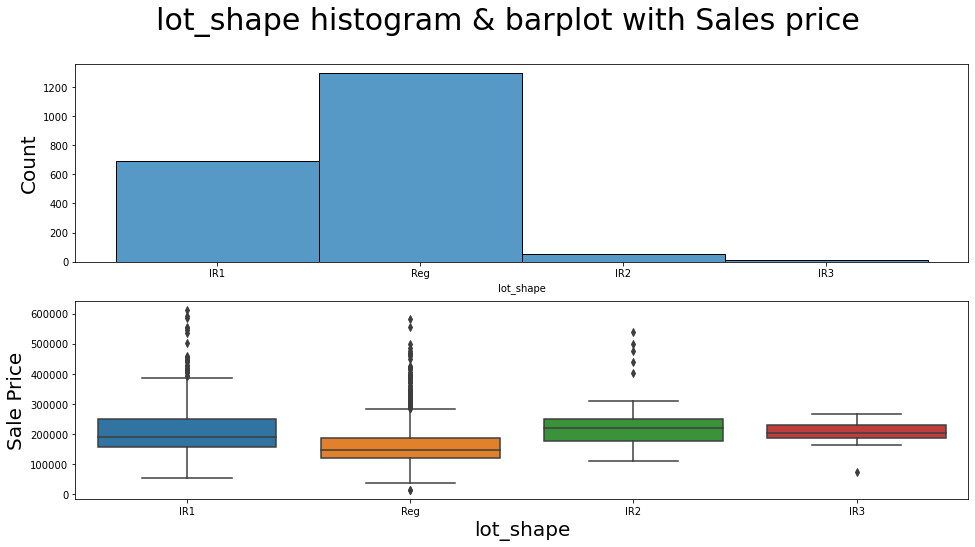

In [17]:
eda_plot(df, 'lot_shape')


lot_shape - General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

Irregular shape properties appear to have higher mean sale price than regular shape.

To generalise the effect we can dummy irregular shape as 1, regular as 0.

In [18]:
df['irreg_shape'] = df['lot_shape'].map(lambda x: 0 if x == 'Reg' else 1)

Category: Quality

In [19]:
features.append('irreg_shape')

##### lot_config

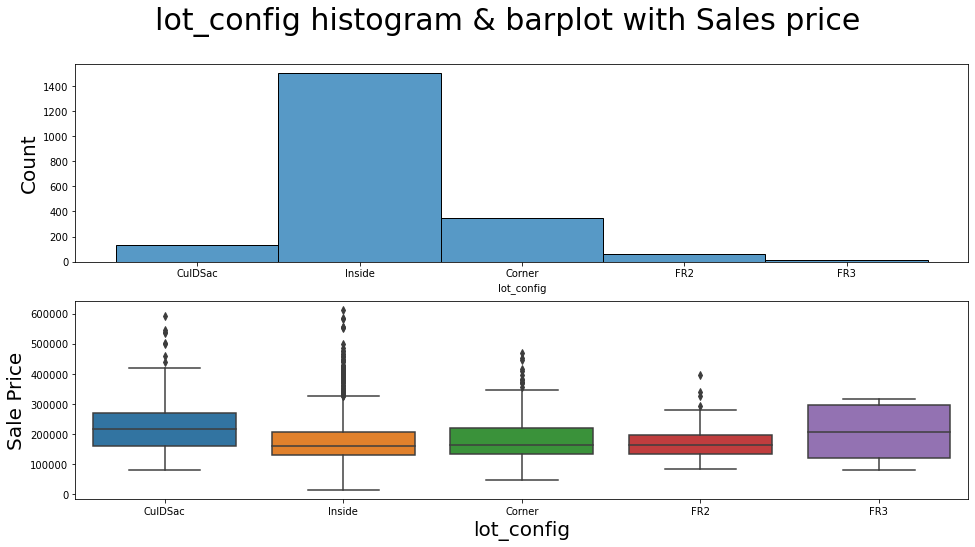

In [20]:
eda_plot(df, 'lot_config')

Lot Config (Nominal): Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

Inside unit, appear to have lower mean sale price than other configuration.

Other config have desirable configurations.

Special configuration are typically more scarce, which may warrant a higher selling price. We can assume that there will typically be less corner units than normal units

https://www.thetruthaboutrealty.com/real-estate-lot-types/ - Interior lots are the most common lots.

Creating a dummy to represent inside lot.

In [21]:
df['inside_lot'] = df['lot_config'].map(lambda x: 1 if x == 'Inside' else 0)

In [22]:
features.append('inside_lot')

Catagory: Quality

##### house_style

In [23]:
df.groupby('house_style')['2nd_flr_sf'].mean()

house_style
1.5Fin     516.293578
1.5Unf       0.000000
1Story       0.577505
2.5Fin    1241.833333
2.5Unf     970.000000
2Story     864.643216
SFoyer      37.780000
SLvl       236.478723
Name: 2nd_flr_sf, dtype: float64

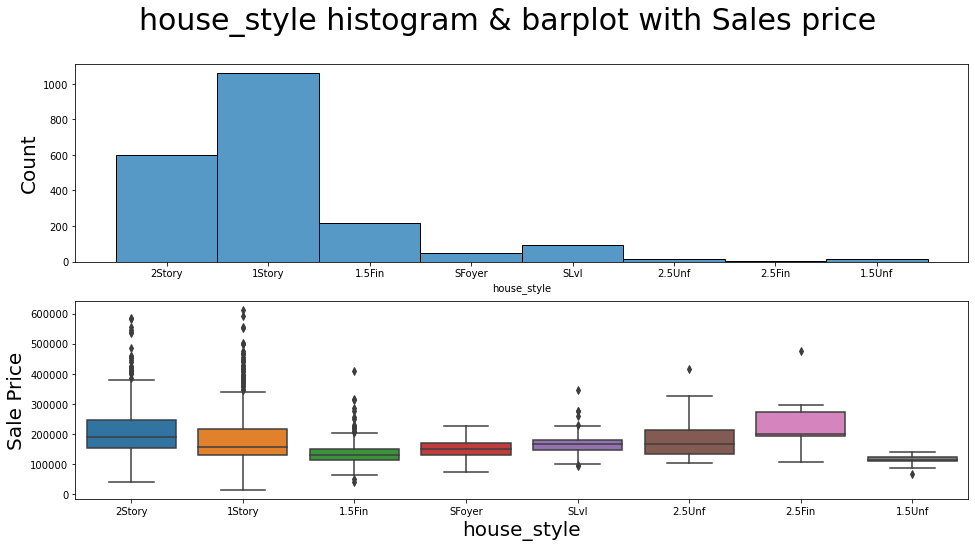

In [24]:
eda_plot(df, 'house_style')


House Style (Nominal): Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

house_style is the style of housing. It represent how many floors are there in the property.

Houses with 1 floor have a lower average sale price than houses with more than 1 floor. We can treat 1.5Fin and 1.5Unf as 1 floor houses.

Creating a dummy variable for 1Story and 1.5Unf as 1 and the other categories as 0

In [25]:
df['one_floor'] = df['house_style'].map(
    lambda x: 1 if x == ('1Story' or '1.5Unf') else 0
)

In [26]:
features.append('one_floor')

Category: Size

##### overall_qual

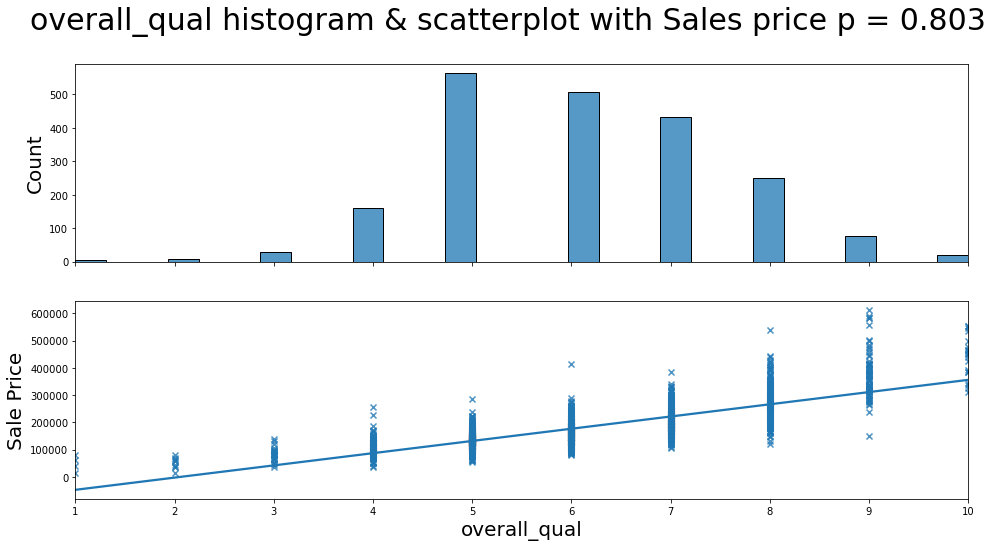

In [27]:
eda_plot(df, 'overall_qual')

good_qual	Rates the overall material and finish of the house. It is ranked from 1 - 10.

The quality of the material and finish of the house is strongly correlated with the price of the house.

This variable is a ordinal variable. To include the variable in the model, we would have to create dummies. For simplicity, since the average price of houses that score 7 and above is above the mean price of all houses (estimated to be around 18k). We create a dummy good_qual for houses with quality above 7.

In [28]:
df.groupby('overall_qual')['saleprice'].mean()

overall_qual
1      48725.000000
2      51081.000000
3      81309.103448
4     107744.037736
5     134963.644760
6     162891.102767
7     203430.285383
8     271437.044000
9     370197.376623
10    440774.809524
Name: saleprice, dtype: float64

In [29]:
df['good_qual'] = df['overall_qual'].map(lambda x: 1 if x >= 7 else 0)

In [30]:
features.append('good_qual')

Category: Quality

##### year_built

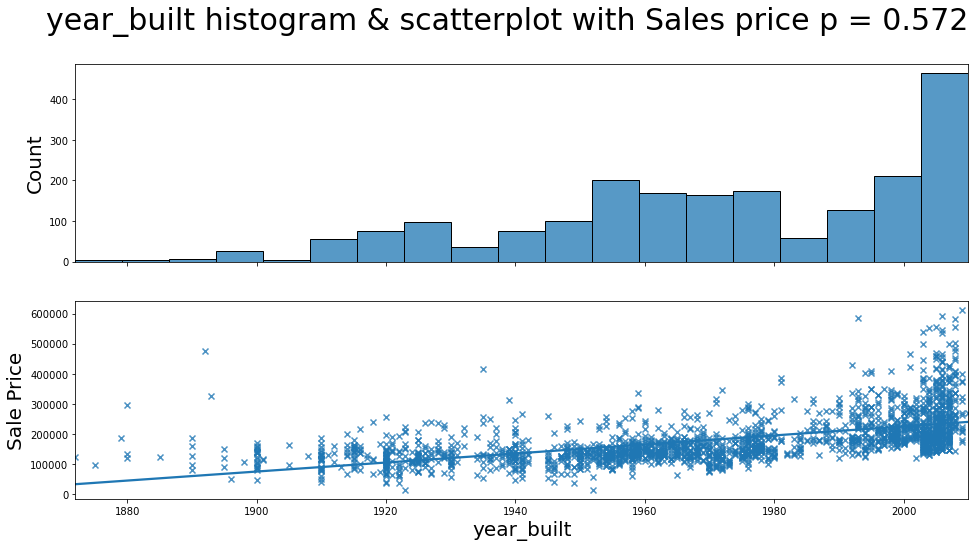

In [31]:
eda_plot(df, 'year_built')


year_built	Original construction date

Older houses sold for less, this is a depreciation effect. 

Histogram weighs heavily to the right, most houses are build in recent time in the dataset.

The year built by itself is not enough to capture the age of the property, we have to calculate the age of the property when it is sold.

In [32]:
df['property_age'] = df['yr_sold'] - df['year_built']

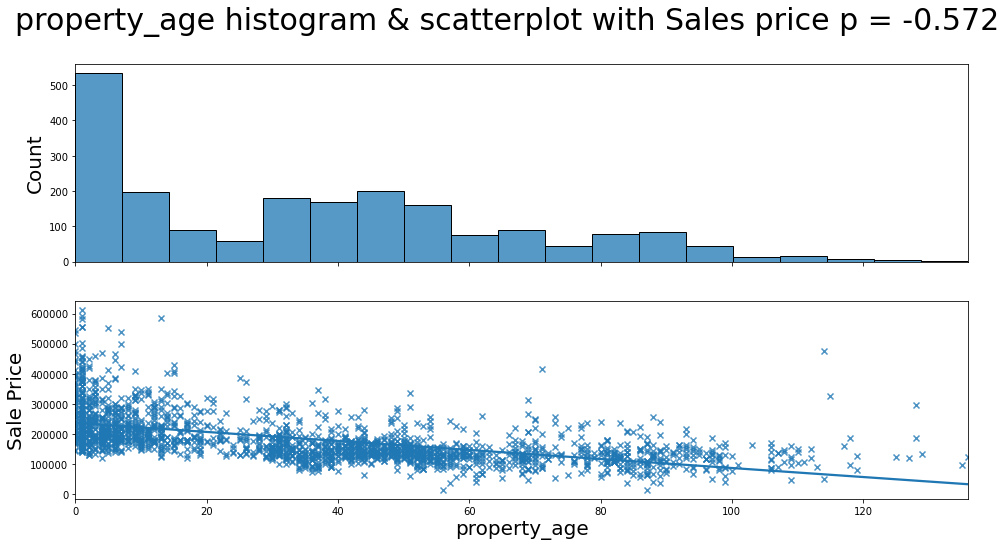

In [33]:
eda_plot(df, 'property_age')


Category: Age

In [34]:
features.append('property_age')

##### mas_vnr_type

Missing values in this variable is likely to be not random, instead it is likely that the houses with null values do not have any masonry veneers. We logically impute the null values to 'None'.

In [35]:
df['mas_vnr_type'].isnull().sum()

22

In [36]:
df['mas_vnr_type'].fillna('None', inplace = True)

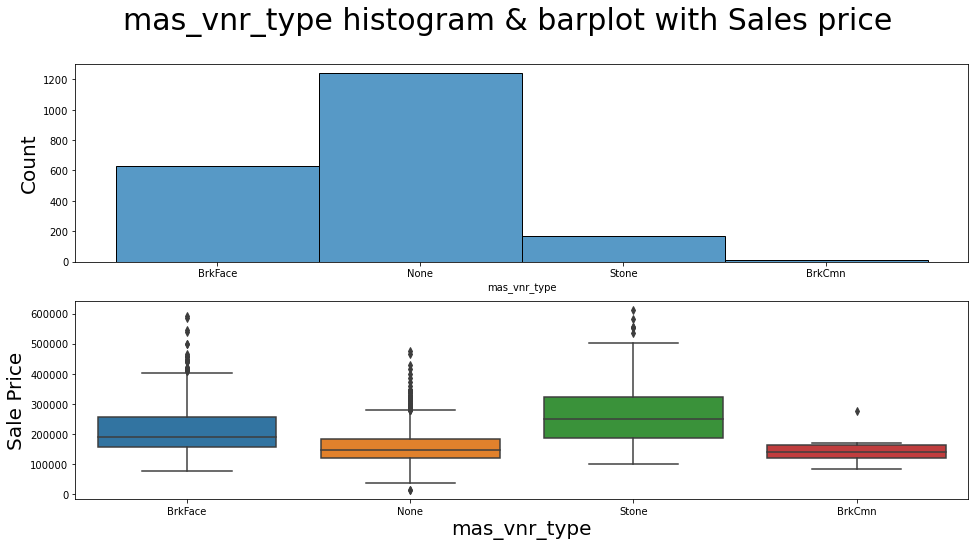

In [37]:
eda_plot(df, 'mas_vnr_type')


mas_vnr_type - Masonry veneer type

Properties with no masonry veneer have a lower mean sale price than otherwise. Masonry veneer is a external layer of brick/stone that helps weatherproof, insulate the property. This adds to the cost of construction, so it would make sense that a property with masonry veneer will be sold for a higher price on average.

https://en.wikipedia.org/wiki/Masonry_veneer#:~:text=Masonry%20veneer%20walls%20consist%20of,is%20called%20%22adhered%20veneer%22.

A dummy variable is created 1 for any form of masonry veneer, 0 for none.

In [38]:
df['have_mas'] = df['mas_vnr_type'].map(lambda x: 0 if x == 'None' else 1)

In [39]:
features.append('have_mas')

Category: Quality

##### exter_qual

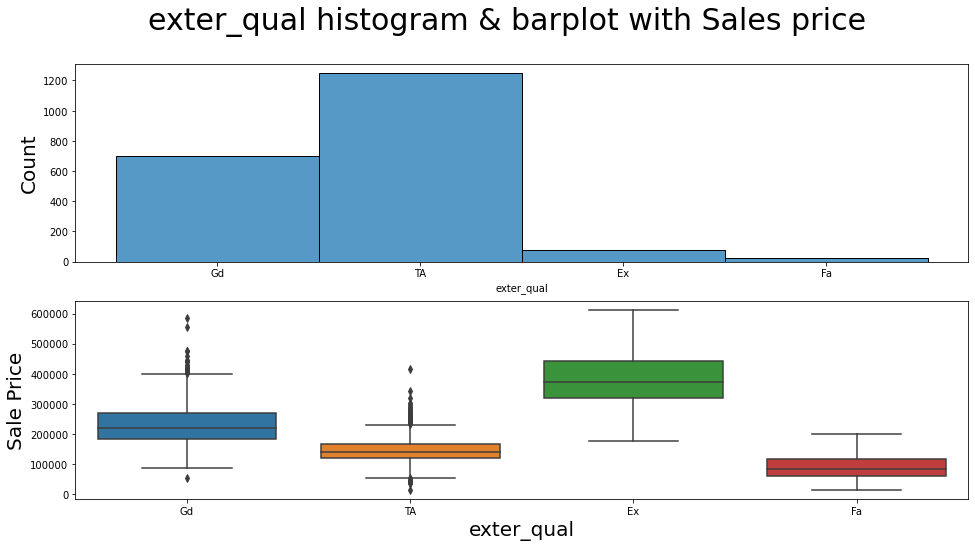

In [40]:
eda_plot(df, 'exter_qual')


Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Good quality and excellent quality exterior houses have much higher mean prices than typical and fair quality.

Creating a dummy for Gd and Ex.

In [41]:
df['good_ext'] = df['exter_qual'].map(lambda x: 1 if (x == 'Gd' or x == 'Ex') else 0)

Category: Quality

In [42]:
features.append('good_ext')

##### total_bsmt_sf

We logically impute null values to 0

In [43]:
df['total_bsmt_sf'].fillna(0, inplace = True)

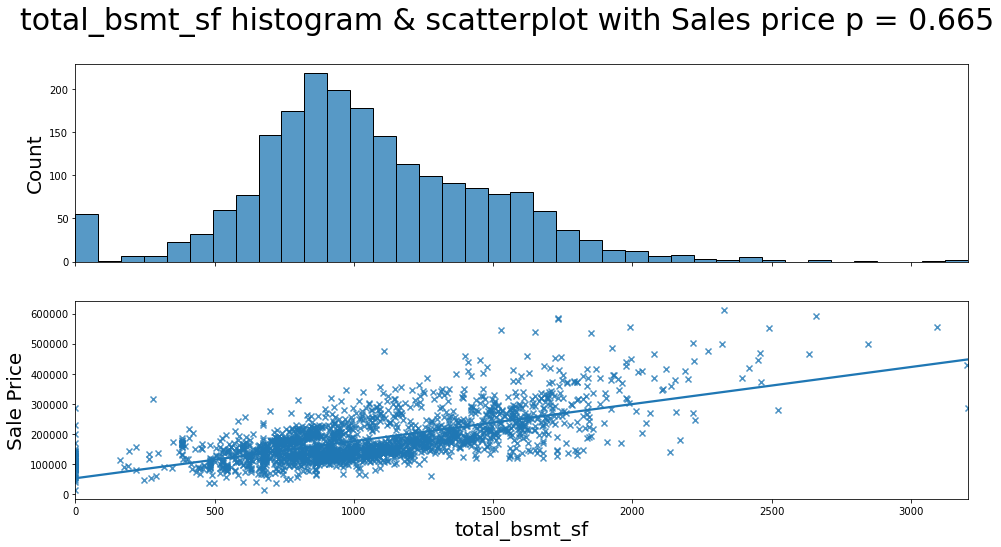

In [44]:
eda_plot(df, 'total_bsmt_sf')

Total Bsmt SF (Continuous): Total square feet of basement area

Variable is positively correlated with sales price.

Category: Size

In [45]:
features.append('total_bsmt_sf')

In [46]:
##### 1st_flr_sf

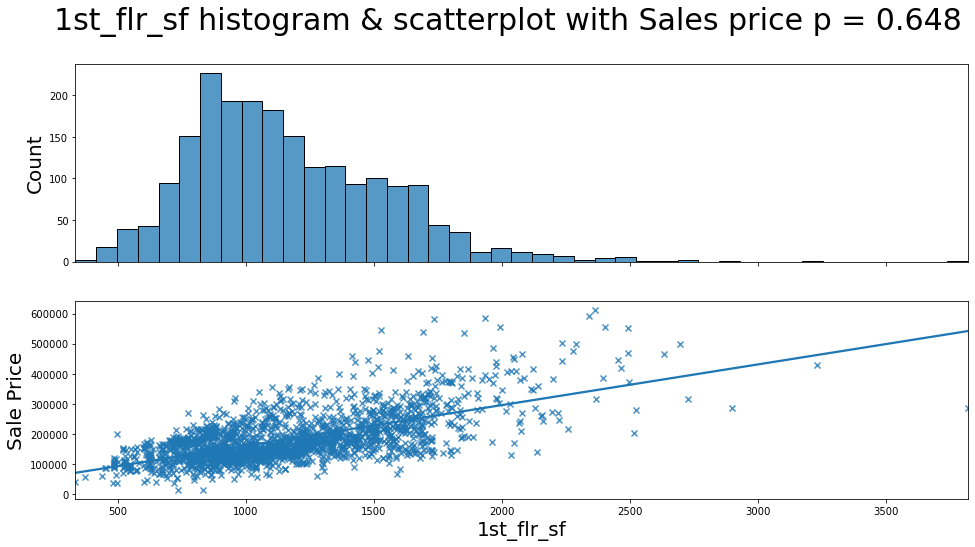

In [47]:
eda_plot(df, '1st_flr_sf')

1st Flr SF (Continuous): First Floor square feet
    
Variable is positively correlated with sales price.

Category: Size

In [48]:
features.append('1st_flr_sf')

##### 2nd_flr_sf

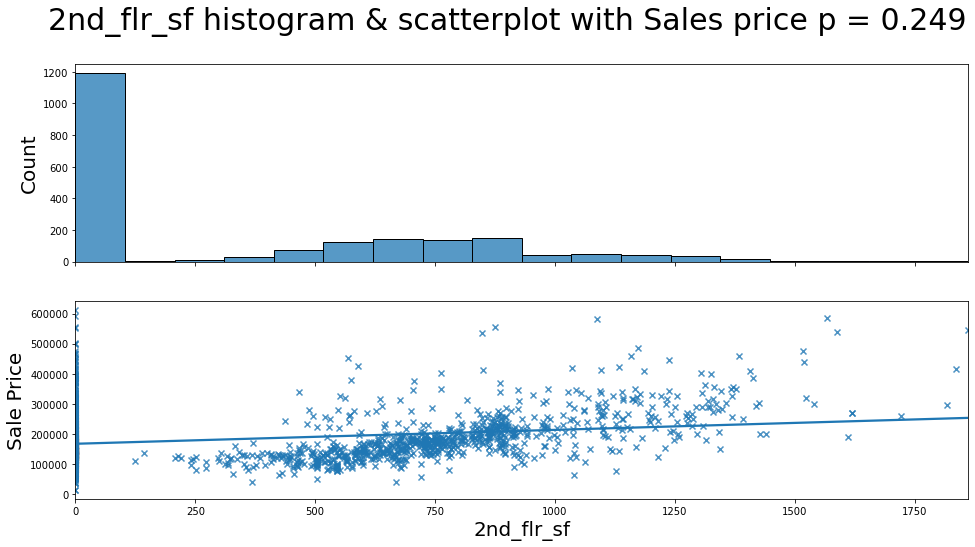

In [49]:
eda_plot(df, '2nd_flr_sf')

2nd Flr SF (Continuous)	: Second floor square feet

Variable is positively correlated with sales price. This variable has a lot of observation with 0. To use this variable, we should explore an interactive term with another variable that captures the presence of 2 floors.

Category: Size

In [50]:
features.append('2nd_flr_sf')

##### gr_liv_area

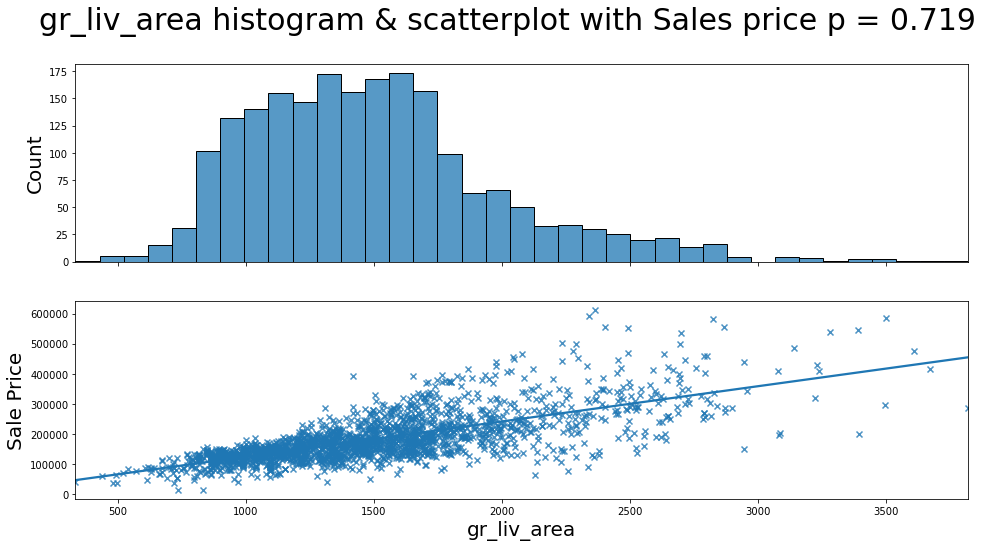

In [51]:
eda_plot(df, 'gr_liv_area')

Gr Liv Area (Continuous): Above grade (ground) living area square feet

Variable is positively correlated with sales price. This is the ideal variable as it captures the size of the property best.

Category: Size

In [52]:
features.append('gr_liv_area')

##### full_bath

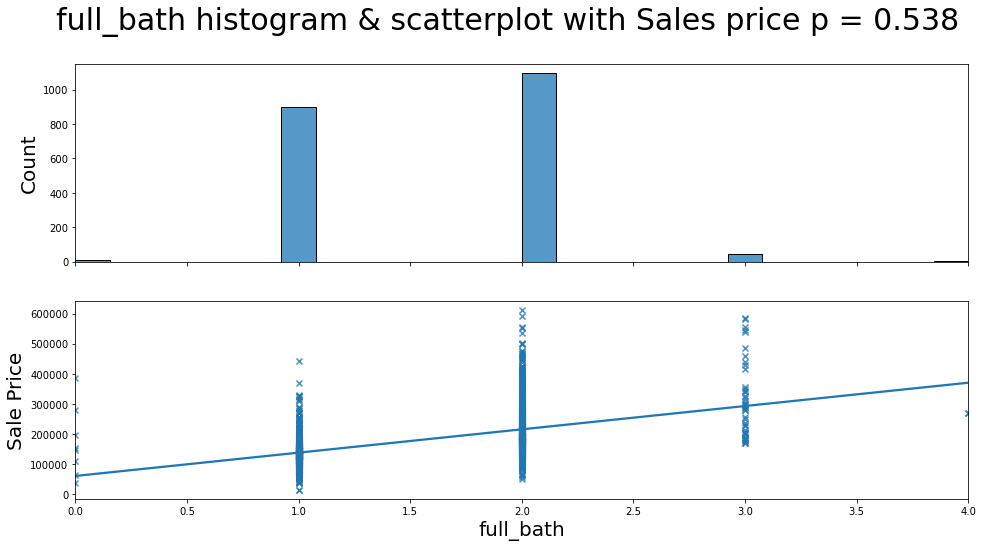

In [53]:
eda_plot(df, 'full_bath')

Full Bath (Discrete): Full bathrooms above grade

Properties with more than 1 baths have a higher mean sale price.

For completeness, we can combine this variable with Basement full bath rooms

Category: Size

In [54]:
df['bsmt_full_bath'].fillna(0, inplace = True)

In [55]:
df['total_bath'] = df['bsmt_full_bath'] + df['full_bath']

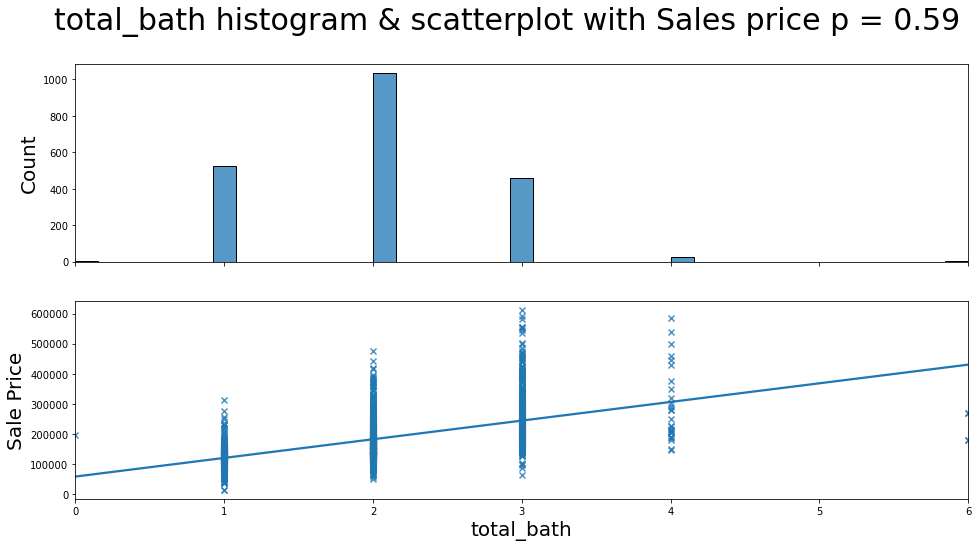

In [56]:
eda_plot(df, 'total_bath')

In [57]:
features.append('total_bath')

##### kitchen_qual

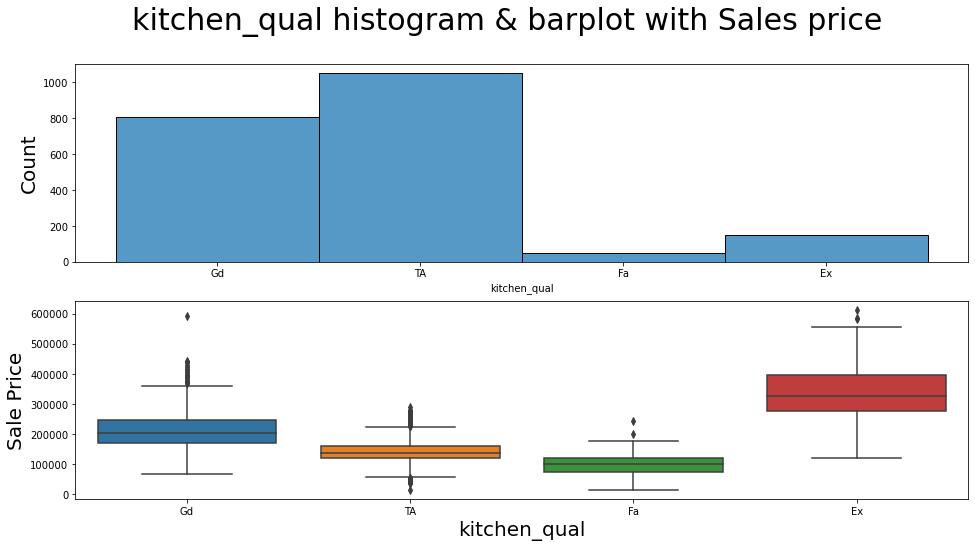

In [58]:
eda_plot(df, 'kitchen_qual')

KitchenQual (Ordinal): Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

Houses with Kitchen quality Good and Excellent have a higher average price than otherwise.

Create dummy for Gd and Ex kitchen quality

In [59]:
df['good_kitchen'] = df['kitchen_qual'].map(lambda x: 1 if (x == 'Gd' or x == 'Ex') else 0)

In [60]:
features.append('good_kitchen')

##### totrms_abvgrd

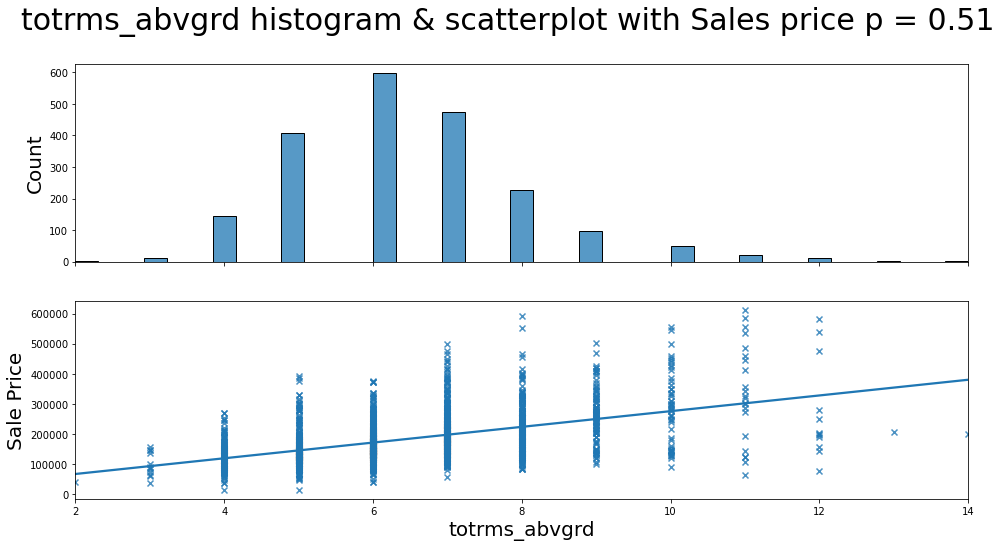

In [61]:
eda_plot(df, 'totrms_abvgrd')

TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)

The more rooms the property has the higher the price.

Category: Size

In [62]:
features.append('totrms_abvgrd')

#### Rejected variables

##### 1) Low variation in the variable:
The most common reason that we reject variables provided in the dataset is because there is no variation in the variable. For catagorical variables, these are known as imbalanced class. Take the following variables for example:

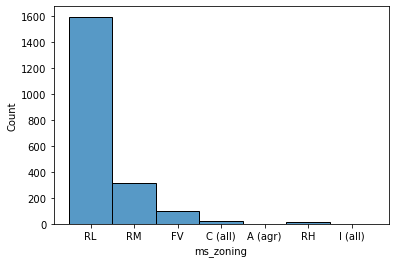

In [63]:
sns.histplot(data=df['ms_zoning']);

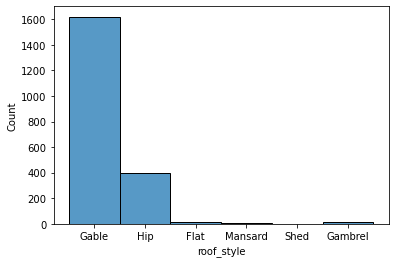

In [64]:
sns.histplot(data=df['roof_style']);

The variables above are have the majority of its distribution in 1 variable. When the variance is low, the feature will not improve the performance of the model. It does not provide information that explains variation in the sales price of the property.

##### 2) Null values

In [65]:
df.isnull().sum().sort_values()

id                  0
functional          0
totrms_abvgrd       0
kitchen_qual        0
kitchen_abvgr       0
                 ... 
fireplace_qu     1000
fence            1649
alley            1909
misc_feature     1985
pool_qc          2041
Length: 90, dtype: int64

Some features have too many null values that cannot be logically imputted

##### 3) Weakly Correlated

Some features have a weak relationship with saleprice, as such these features will not be added to the model.

#### Summary

From filtering the available variables, we selected the following features for consideration for the model.

| Feature | Type | From | Category | Description |
|-|-|-|-|-|
|irreg_shape | Dummy | created | Quality | 1 if lot shape is irregular else 0 |
| inside_lot | Dummy | created | Quality | 1 if lot configuration is inside lot else 0 |
| one_floor | Dummy | created | Size | 1 if house style is 1 story or 1.5 story with 2nd level unfinished |
| good_qual | Dummy | created | Quality | 1 if overall quality of house is above 7 else 0 |
| property_age | int64 | created | Age | Age of property when sold |
| have_mas | Dummy | created | Quality | 1 if property has masonry veneer else 0 |
| good_ext | Dummy | created | Quality | 1 if External quality is good or excellent else 0 |
| total_bsmt_sf | float64 | dataset | Size | Total square feet of basement area |
| 1st_flr_sf | Int64 | dataset | Size | First Floor square feet |
| 2nd_flr_sf | Int64 | dataset | Size | Second floor square feet |
| gr_liv_area | Int64 | dataset | Size | Above grade living area square feet |
| total_bath | Int64 | dataset | Size | Total full bath in the property |
| good_kitchen | Dummy | created | Quality | 1 if kitchen quality is good or excellent |
| totrms_abvgrd | Int64 | dataset | Size | Total rooms above grade |

<a id='mod'></a>
## Modeling

Our main task is to predict the sale price of properties in Ames Iowa. We have selected features that have a linear-like relationship with sale price and will likely provide some predictive powers. In this section, we will run through the iterative process of fitting a model. 

1) Select variables

2) Tune model with hyperparameters

3) K-fold cross validation

In this regression analysis, we will be using regular OLS and regularised regression algorithms (Lasso and Ridge).

### All feature model

#### OLS

In [66]:
# Features in the model
features = [
    'irreg_shape',
    'inside_lot',
    'one_floor',
    'good_qual',
    'property_age',
    'have_mas',
    'good_ext',
    'total_bsmt_sf',
    '1st_flr_sf',
    '2nd_flr_sf',
    'gr_liv_area',
    'total_bath',
    'good_kitchen',
    'totrms_abvgrd',
]

In [67]:
# Model prep: feature matrix (X) and target vector (y)
X = df[features]
y = df["saleprice"]

In [68]:
# Train test split
X_train, X_hold, y_train, y_hold = train_test_split(X,y,train_size = 0.75)

The evaluation metric of choice is root mean squared error as the task is to best predict sale price. We evaluate the model with a k-fold cross validation, to validate our model's ability to generalise new data. 

In [69]:
# Cross validation
- cross_val_score(
LinearRegression(),
X_train,
y_train,
cv = 5,
scoring = 'neg_root_mean_squared_error').mean()

37081.09308703886

This is the baseline score for the model

In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [71]:
len(lr.coef_)

14

In [72]:
lrcoef = pd.DataFrame({"Feature":X_train.columns.tolist(),
             "Coefficients":lr.coef_})

In [73]:
lrcoef

,Feature,Coefficients
0,irreg_shape,6058.883478
1,inside_lot,-656.178708
2,one_floor,-5742.698846
3,good_qual,19247.481086
4,property_age,-325.444615
5,have_mas,8380.915644
6,good_ext,13036.761718
7,total_bsmt_sf,42.636701
8,1st_flr_sf,48.947296
9,2nd_flr_sf,26.809250


The table above shows the feature and the coefficent for the regression model.

The coefficients are largely behaving as expected. Features that are positively correlated with saleprice have positive correlation.

1 outlier is the totrms_abvgrd (total rooms above grade). The coefficient is negative, this should not be the case as the more rooms a property has the higher the saleprice on average.

In [74]:
# Calculating RMSE of the model fitted to train with the holdout set
mean_squared_error(LinearRegression().fit(X_train,y_train).predict(X_hold),y_hold)**0.5

33994.848096734095

The model performs similarly when predicting the holdout set.

#### Regularisation

Regularisation is a technique that can help to prevent overfitting. In this portion, we will fit and cross validate the model to find the optimal hyperparameter that will minimise the MSE. 

In [75]:
# Scale the data for regularisation
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_hold_s = ss.transform(X_hold)


In [76]:
ridgecv = RidgeCV(alphas = np.logspace(.1, 100, 100))

ridgecv.fit(X_train_s, y_train)

- cross_val_score(Ridge(alpha=ridgecv.alpha_),
                  X_train_s,
                  y_train, cv=5, 
                  scoring='neg_root_mean_squared_error').mean()

36929.344323282116

In [77]:
ridgecv.alpha_

12.855557319139026

In [78]:
lassocv = LassoCV(n_alphas = 200)

lassocv.fit(X_train_s, y_train)

- cross_val_score(Lasso(alpha=lassocv.alpha_),
                  X_train_s,
                  y_train, cv=5, 
                  scoring='neg_root_mean_squared_error').mean()

36928.49188384552

In [79]:
lassocv.alpha_

392.2758295145904

The Ridge and Lasso regularisation performed similiar to the OLS model. This implies that the model does not suffer from overfitting. This could be because we limit the regression model to 14 features.

As the RMSE between the 3 models are roughly the same, we will use the OLS model as it is the simplest.

In [80]:
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
predictions = lr.predict(X_hold)

In [82]:
mean_squared_error(y_hold,predictions)**0.5

33994.848096734095

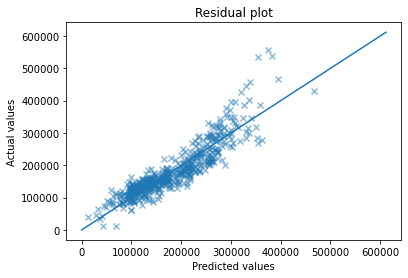

In [83]:
ax = plt.axes()
ax.plot(np.linspace(0,max(y)),np.linspace(0,max(y)))
ax.scatter(predictions, y_hold, marker = "x", alpha = 0.5)
ax.set(xlabel = 'Predicted values', ylabel = 'Actual values', title = 'Residual plot');


Looking at the plot between the predicted values and actual values, we see that the residual (the vertical distance from the straight line to the point) are positively biased at high values. This means the model underpredicts houses with high saleprices.


### Overfitted model

We saw that the model does not suffer from overfitting as the ridge and lasso regularisation did not penalise the coefficients that much. In the next model, we will explore the effects of interaction terms and 2nd order polynomial terms between the features. The model will suffer from multicollinearity, which adversely affects the predicton score, however with Ridge and Lasso regression this will not be an issue.

In [84]:
# Features in the model
features = [
    'irreg_shape',
    'inside_lot',
    'one_floor',
    'good_qual',
    'property_age',
    'have_mas',
    'good_ext',
    'total_bsmt_sf',
    '1st_flr_sf',
    '2nd_flr_sf',
    'gr_liv_area',
    'total_bath',
    'good_kitchen',
    'totrms_abvgrd',
]

In [85]:
# Model prep: feature matrix (X) and target vector (y)
X = df[features]
y = df["saleprice"]

In [86]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures()
# Create X_poly
X_poly = poly.fit_transform(X)

In [87]:
X_poly.shape

(2049, 120)

PolynomialFeatures transformation changes the features to 120, all interaction terms and 2nd polynomial term are included in the model.

In [88]:
# Train test split
X_train, X_hold, y_train, y_hold = train_test_split(X_poly,y,train_size = 0.75)

#### OLS

In [89]:
# Cross validation
- cross_val_score(
LinearRegression(),
X_train,
y_train,
cv = 5,
scoring = 'neg_root_mean_squared_error').mean()

31309.311582983973

The overfitted model with OLS regression scored very badly, by overfitting the model, the model predictive power on unseen data.

#### Ridge regularisation

In [90]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_hold_s = ss.transform(X_hold)


In [91]:
ridgecv = RidgeCV(alphas = np.logspace(.1, 100, 100))

ridgecv.fit(X_train_s, y_train)

- cross_val_score(Ridge(alpha=ridgecv.alpha_),
                  X_train_s,
                  y_train, cv=5, 
                  scoring='neg_root_mean_squared_error').mean()

29811.90130507577

In [92]:
ridgecv.alpha_

131.2749368925199

Ridge regression improved the RMSE substantially

#### Lasso regularisation

In [93]:
lassocv = LassoCV(n_alphas = 200)

lassocv.fit(X_train_s, y_train)

- cross_val_score(Lasso(alpha=lassocv.alpha_),
                  X_train_s,
                  y_train, cv=5, 
                  scoring='neg_root_mean_squared_error').mean()

C:\Users\hwtan\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1092878027.4638672, tolerance: 906318246.8138481
  model = cd_fast.enet_coordinate_descent(
C:\Users\hwtan\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326100520.583252, tolerance: 748901665.1378049
  model = cd_fast.enet_coordinate_descent(
C:\Users\hwtan\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2180288128.0438232, tolerance: 722925569.6685143
  model = cd_fast.enet_coordinate_descent(
C:\Users\hwtan\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordi

29921.463156931954

In [94]:
lassocv.alpha_

131.2139017835225

Lasso regression had the same effect where it improved the RMSE when cross validating. As the model is overfitted with features, it will be interesting to explore what the coefficients for the optimal Lasso regression.

In [95]:
lasso_coef = pd.DataFrame({"Feature":poly.get_feature_names(features),
                             "Coefficients":lassocv.coef_})

In [96]:
lasso_coef[lasso_coef['Coefficients'] == 0].count()[0]

53

The coefficients for 56 variables were penalised to 0

In [97]:
lasso_coef.sort_values(by = 'Coefficients', ascending = False)

,Feature,Coefficients
59,good_qual 1st_flr_sf,17172.154932
86,good_ext 1st_flr_sf,10905.228365
11,gr_liv_area,9924.904922
9,1st_flr_sf,9277.696054
103,1st_flr_sf good_kitchen,9169.311753
...,...,...
7,good_ext,-6992.101362
74,property_age totrms_abvgrd,-6993.624993
90,good_ext good_kitchen,-7345.978915
117,good_kitchen^2,-7791.632248


The table above shows the top 5 and lowest 5 feature and their coefficients. One issue with such method is that the coefficients will not have any inferrential meaning.

The lasso regression performed the best in predicting home prices. Testing the model on the holdout set.

In [98]:
lassoreg = Lasso(alpha = lassocv.alpha_)

In [99]:
lassoreg.fit(X_train,y_train)

C:\Users\hwtan\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624519290341.501, tolerance: 906318246.8138481
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=131.2139017835225)

In [100]:
predictions = lassoreg.predict(X_hold)

In [101]:
mean_squared_error(y_hold,predictions)**0.5

35766.66515762367

The model performs well with the holdout set.

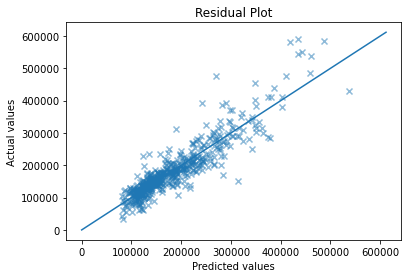

In [102]:
ax = plt.axes()
ax.plot(np.linspace(0,max(y)),np.linspace(0,max(y)))
ax.scatter(predictions, y_hold, marker = "x", alpha = 0.5)
ax.set(xlabel = 'Predicted values', ylabel = 'Actual values', title = 'Residual Plot');


The overfitted model resolved some of the issues where the model under predict values of high home prices.

### Ideal model

|Model|Features|mean RMSE from CV|
|---|---|---|
|OLS|regular|36642.33|
|Ridge|regular|36505.57|
|Lasso|regular|36423.65|
|OLS|degree-2 polynomial|77917.89|
|Ridge|degree-2 polynomial|31632.67|
|Lasso|degree-2 polynomial|31497.68|


Based on the models created above, the model that best predict home prices is a Lasso regression on the polynomial features. This is the model that will be used to test on Kaggle unseen data.

<a id='kag'></a>
## Kaggle submission

Based on the ideal model above, we will test for unseen data from the Kaggle testset. The following code is just the steps taken to prepare for the Kaggle submission


#### Results

The model was used to predict unseen test data provided by Kaggle. The predictions got a RMSE of 28945.83121.

In [103]:
testdata = pd.read_csv('datasets/test.csv')

In [104]:
# Transform dataset
new_col_name = {col:col.replace(" ","_").lower() for col in testdata}
testdata.rename(columns = new_col_name, inplace = True)

# Fill null values
testdata['mas_vnr_type'].fillna('None', inplace = True)
testdata['total_bsmt_sf'].fillna(0, inplace = True)
testdata['bsmt_full_bath'].fillna(0, inplace = True)

# Feature Engineering
testdata['irreg_shape'] = testdata['lot_shape'].map(lambda x: 0 if x == 'Reg' else 1)
testdata['inside_lot'] = testdata['lot_config'].map(lambda x: 1 if x == 'Inside' else 0)
testdata['one_floor'] = testdata['house_style'].map(lambda x: 1 if x == ('1Story' or '1.5Unf') else 0)
testdata['good_qual'] = testdata['overall_qual'].map(lambda x: 1 if x >= 7 else 0)
testdata['property_age'] = testdata['yr_sold'] - testdata['year_built']
testdata['have_mas'] = testdata['mas_vnr_type'].map(lambda x: 0 if x == 'None' else 1)
testdata['good_ext'] = testdata['exter_qual'].map(lambda x: 1 if (x == 'Gd' or x == 'Ex') else 0)
testdata['total_bath'] = testdata['bsmt_full_bath'] + testdata['full_bath']
testdata['good_kitchen'] = testdata['kitchen_qual'].map(lambda x: 1 if (x == 'Gd' or x == 'Ex') else 0)


In [105]:
# Features in the model
features = [
    'irreg_shape',
    'inside_lot',
    'one_floor',
    'good_qual',
    'property_age',
    'have_mas',
    'good_ext',
    'total_bsmt_sf',
    '1st_flr_sf',
    '2nd_flr_sf',
    'gr_liv_area',
    'total_bath',
    'good_kitchen',
    'totrms_abvgrd',
]

In [106]:
# Model prep: feature matrix (X) and target vector (y)
X_train = df[features]
y_train = df["saleprice"]
X_test = testdata[features]

In [107]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures()
# Create X_poly
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

In [108]:
# Scale the features
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train_p)
X_test_s = ss.transform(X_test_p)

In [109]:
lassocv = LassoCV(n_alphas = 200)

lassocv.fit(X_train_s, y_train)

lassocv.alpha_


69.68760481685213

In [110]:
lr = Lasso(lassocv.alpha_)
lr.fit(X_train_s,y_train)
prediction = lr.predict(X_test_s)

In [111]:
upload = pd.DataFrame({"Id":testdata['id'],"SalePrice":prediction})

In [112]:
upload.to_csv('datasets/upload.csv', index = False)

<a id='conclusion'></a>
### Conclusion and Evaluation

In this notebook, we selected features that had a clear relationship with sales price. We fit those features into linear regression models to see its predictive power. With the plain features alone we saw that the coefficients of the OLS regression model was useful for the task of inference. To improve the predictive power of the model, the features were transformed to the 2nd degree polynomial features. This greatly improved the predictive power when we use regularisation to penalise coefficients.

#### Business Recommendations

The OLS model with the features gave sensible coefficients that can be interpreted to see which factor affects the price of home. However do note that the model may suffer from endogeneity, omitted variable bias, heteroskedastic errors and so should not be taken literally.

Looking back at the OLS model with the plain features

In [113]:
lrcoef

,Feature,Coefficients
0,irreg_shape,6058.883478
1,inside_lot,-656.178708
2,one_floor,-5742.698846
3,good_qual,19247.481086
4,property_age,-325.444615
5,have_mas,8380.915644
6,good_ext,13036.761718
7,total_bsmt_sf,42.636701
8,1st_flr_sf,48.947296
9,2nd_flr_sf,26.809250


The factor that adds the most value to a home apart from size is have a good overall material and finish (good_qual).

#### Evaluation

1) The features selected for the model, proved to be underfitted. More variables could be selected from the dataset when creating a baseline model.

2) The model is lacking in location information, location affects the price of houses. It could be worth to properly investigate on the neighborhood variable. It is noted that many neighborhoods in the dataset had less than 10 observation and hence it was not considered. Given more time, we could classify the neighborhoods into distance from city centre or the nature of the location.

3) The year the property was sold did not show much variance at a high level. More could be done to investigate this variable. The dataset was for the years 2006 - 2010, which was also the time when the Global Financial Crisis happened (2008-2009). We were not able to see the effects of high home prices in 2006 - 2007 before the home prices crash in 2008 with the sub prime mortgage crisis.

4) Home prices were positively skewed, on hindsight, it could be better practice to log-transform the price so that it resembles a normal distribution.